# Photon noise

In this exercice, we will study the properties of photon noise.
When measuring a flux coming from an astronomical source, the uncertainty is very often dominated by the photon noise, which originates from the particle nature of light.
Indeed, measuring a flux consists in counting the photons that strike a detector (ex: CCD).
If the exposure time is short, the number of photons is low, and the discrete (integer) nature of the measurement makes it hard to obtain good precision.  
Let $f$ be the true incident flux in number of photons per second.

In [1]:
#%matplotlib inline
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

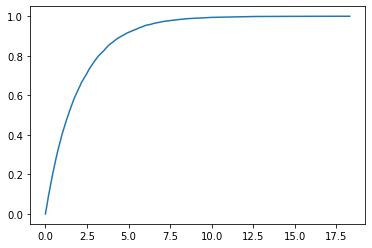

In [2]:
n1 = 10000
u1 = np.random.random(n1)
z1 = -2*np.log(1-u1)
z2 = np.sort(z1)
f1 = np.arange(1,n1+1)/n1 #CDF of Z
plt.plot(z2,f1)

### 1. Very short exposure time

We first consider the extreme case of a very short exposure time $\delta t$,
and we assume that **atmost one** photon strikes the detector during this exposure.  
We denote by $X_1$ the random variable: number of photons detected during this short exposure.

What kind of random variable is it? What is the target space?  
What is the distribution followed by $X_1$ (probability mass function)?  
What are the expectation and the variance of $X_1$?

1. Discrete variable, target space: 0 or 1.
2. Probability mass function (PMF): $p(X=1) = f\delta t$, and $p(X=0) = 1-p$, where $f$ is incident flux in photon/sec 
3. Expectation value:
$E(X) = \Sigma_i P(X=i) \times i = (1-p)\times 0 + p \times 1 = p$ and Variance:
$var(X) = E((X-E(X))^2) = E(X^2) - (E(X))^2 = ((1-p)\times 0^2 + p \times 1^2) -(p)^2 = p - p^2 = p(1-p)$

### 2. Successive short exposures

We take 2 successive (and independent) exposures of duration $\delta t$.

What is the distribution of the total number of photons $X_2$?  
What are the expectation and the variance of $X_2$?  

Same questions for $n$ successive exposures of duration $\delta t$ ($X_n$).

For 2 successive (and independent) exposures,

1. Target space: 0,1,2
2. Probability mass function (PMF): $P(X_0) = (1-p)^2, P(X_1) = 2p(1-p), P(X_2) = p^2$
3. $E(X_2) = E(X_1) + E(X'_1) = 2p$
4. $var(X_2) = var(X_1) + var(X'_1) + 2 cov(X_1, X'_1) = 2p(1-p)$

For $n$ successive (and independent) exposures,

1. Target space: $0, 1, 2, ..., n$
2. PMF: $p(X_0) = (1-p)^n, p(X_1) = p(1-p)^{n-1}, ..., p(X_n) = p^n \\ \Rightarrow P(X_k) = \binom{n}{k} p^k (1-p)^{n-k}$
3. $E(X_n) = E(X_0) + E(X_1) + ... + E(X_n) = np$
4. $var(X_n) = var(X_0) + var(X_1) + ... + var(X_n) = np(1-p)$

We now check this numerically:

In [3]:
def pmf_Xn(n, p, k):
    """
    This function returns the probability to detect k photons after
    n successive exposures,
    with a probability p of detection for each exposure.
    """
    aa = sp.binom(n,k)*p**k*(1-p)**(n-k)
    return aa

In [4]:
def generate_random_Xn(n, p):
    """
    This function returns the number of photons detected after
    a virtual experiment of n successive exposures,
    with a probability of detection p for each exposure.
    One realisation of experiment (of exposing 100 short exposure to ccd)
    """
    bb = np.sum(np.random.rand(n) < p)
    return bb

Compare the results of pmf_Xn with samples generated with generate_random_Xn (plot the CDF, PMF).

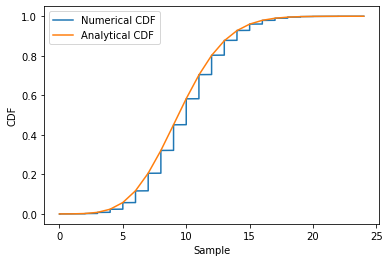

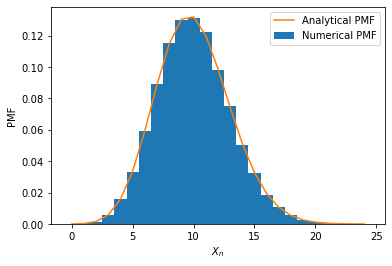

In [5]:
# TODO
n1 = 100          #nth exposure
p1 = 0.1          #prob. of hitting
nsamp = 100000   #sample size, nos of time we repeat the experiment; each time we take n1 successive exposures.

samp = np.array([]) #Result of experiment 10000 times, nos. of hit photon in each experiment
for i in range(nsamp):
    yy = generate_random_Xn(n1,p1)
    samp = np.hstack((samp, yy))
    
samp1 = np.sort(samp)
FF = np.arange(1,nsamp+1)/nsamp #CDF

k = np.arange(samp1.max()+1)
samp_ana_pmf = np.array([]) #Analytical PDF
for i in range(len(k)):
    yy = pmf_Xn(n1, p1, k[i])
    samp_ana_pmf = np.hstack((samp_ana_pmf, yy))
    
samp_ana_cdf = np.cumsum(samp_ana_pmf)


plt.plot(samp1, FF, label='Numerical CDF')
plt.plot(k, samp_ana_cdf, label='Analytical CDF')
plt.xlabel('Sample')
plt.ylabel('CDF')
plt.legend()
plt.show()

plt.hist(samp, bins=np.concatenate(([-0.5],k+0.5)), density=True, label='Numerical PMF')
plt.plot(k, samp_ana_pmf, label='Analytical PMF')
plt.xlabel("$X_n$")
plt.ylabel("PMF")
plt.legend()
plt.show()

In [6]:
def expectation_Xn(n, p):
    """
    This function returns the expectation of the number of detections after n exposures,
    each with a probability p of detection.
    """
    return n*p
    
def variance_Xn(n, p):
    """
    This function returns the variance of the number of detections after n exposures,
    each with a probability p of detection.
    """
    return n*p*(1-p)

Compare with the expection and the variance computed on samples generated with generate_random_Xn.

In [7]:
# TODO
print('Analytical Expectation: ', expectation_Xn(n1,p1))
print('Analytical Variance: ', variance_Xn(n1,p1))
print('------------------------------------------------')
print('Numerical Expectation: ', np.mean(samp))
print('Numerical Variance: ', np.var(samp))

Analytical Expectation:  10.0
Analytical Variance:  9.0
------------------------------------------------
Numerical Expectation:  9.99962
Numerical Variance:  8.9579998556


Note: $X_1$ and $X_n$ follow very classical distributions that you should remember.  
$X_1$ follows a Bernouilli distribution with parameter $p$,  
$X_n$ follows a binomial distribution with parameters $n$ and $p$.

### 3. Long exposure

We now consider a long exposure time $T$, during which several photons can strike the detector.

What is the distribution of the total number of photons $X_T$?  
Hint: Consider the limit case of $X_n$ (binomial distribution) where $n\to\infty$, $\delta t = T/n \to 0$, and use Stirling's formula.  
Hint 2: Do not spend to much time on it, search for "Poisson limit theorem" and go on.

What are the expectation and the variance of $X_T$?  

**Answer:**  
$X_T$ is the limit of $X_n$ ($n\to\infty$), with  
$\delta t = T/n$,  
$p = f\delta t = fT/n$.

Let us recall that:  
$P(X_n = k) = \binom{n}{k} p^k (1-p)^{n-k}$

We now want an asymptotic equivalent of this formula when $n \to \infty$.
We recall that  
$\binom{n}{k} = \frac{n!}{(n-k)!k!} $  
and use Stirling's formula to obtain asymptotic equivalents for $n!$ and $(n-k)!$
$\binom{n}{k} = \frac{n!}{(n-k)!k!} \sim \frac{1}{k!} \sqrt{\frac{n}{n-k}} \exp\big(n\ln(n) - (n-k)\ln(n-k) + (n-k-n)\big)$  
$\binom{n}{k} \sim \frac{1}{k!} \exp\big(n\ln(n) - (n-k)\ln(n) + (n-k)k/n -k\big) \sim \frac{n^k}{k!}$  

The second term in the expression of $P(X_n = k)$ is  
$p^k = \left(\frac{fT}{n}\right)^k$  
and the last term is  
$(1-p)^{n-k} = \left(1-\frac{fT}{n}\right)^{n-k} = \exp\big((n-k)\ln(1-fT/n)\big) \sim e^{-fT}$

Finally, we obtain
$P(X_n = k) \sim \displaystyle\frac{(fT)^k}{k!} e^{-fT}$  
Thus
$ P(X_T = k) = \displaystyle\frac{(fT)^k}{k!} e^{-fT}$,  
which is the PMF of the Poisson distribution.

For the expectation and variance, we simply note that  
$\forall n, \quad E(X_n) = np = fT$,  
So in the limit $n\to\infty$, we still have  
$E(X_T) = fT$  
Similarly,  
$var(X_n) = np(1-p) = fT\left(1-\frac{fT}{n}\right) \sim fT = var(X_T)$

Numerical checks:

In [8]:
def pmf_poisson(f, T, k):
    """
    This function returns the probability to detect k photons after an exposure time T,
    given an incident flux f.
    """
    ab = (f*T)**k
    bc = np.exp(-f*T)
    cd = sp.factorial(k)
    yy = (ab*bc)/cd
    return yy

Plot the evolution of pmf_Xn for different values of n, and compare with pmf_poisson, with:  
f = 0.01  
T = 5.2  
k = 2  

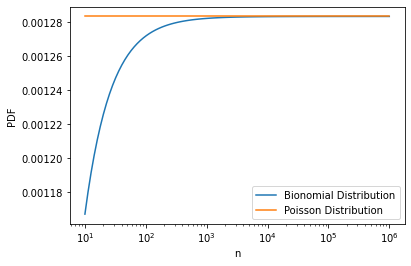

In [9]:
# TODO
f = 0.01
T = 5.2
k = 2

# To calculate PMF for bionomial distribution for large n
nn = np.logspace(1,6,100)
pmf_bio = np.array([])
for i in range(len(nn)):
    yy = pmf_Xn(nn[i], f*T/nn[i], k)
    pmf_bio = np.hstack((pmf_bio, yy))
    
pmf_poi = np.array([])
for _ in range(len(nn)):
    yy1 = pmf_poisson(f,T,k)
    pmf_poi = np.hstack((pmf_poi, yy1))

plt.plot(nn, pmf_bio, label='Bionomial Distribution')
plt.plot(nn, pmf_poi, label='Poisson Distribution')
plt.legend()
plt.xscale('log')
plt.xlabel('n')
plt.ylabel('PDF')
plt.show()

In [10]:
def expectation_poisson(f, T):
    """
    This function returns the expectation of the number of detections after an exposure time T,
    given an incident flux f.
    """
    return f*T

def variance_poisson(f, T):
    """
    This function returns the variance of the number of detections after an exposure time T,
    given an incident flux f.
    """
    return f*T

Plot the evolution of expectation_Xn (resp. variance_Xn) for different values of n, and compare with expectation_poisson (resp. variance_poisson), with:  
f = 0.01  
T = 5.2

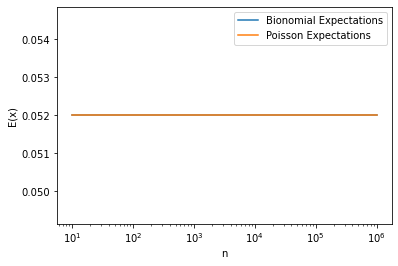

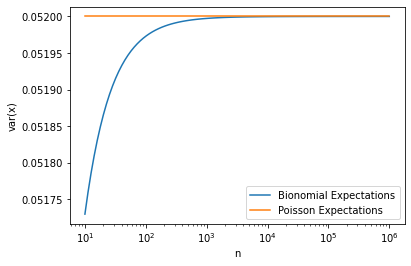

In [11]:
# Expectation
ex_bio = np.array([])
var_bio = np.array([])
for i in range(len(nn)):
    yy = expectation_Xn(nn[i], f*T/nn[i])
    ex_bio = np.hstack((ex_bio, yy))
    zz = variance_Xn(nn[i], f*T/nn[i])
    var_bio = np.hstack((var_bio, zz))
    
ex_poi = expectation_poisson(f,T)*np.ones(len(nn))
var_poi = variance_poisson(f,T)*np.ones(len(nn))

plt.plot(nn, ex_bio, label='Bionomial Expectations')
plt.plot(nn, ex_poi, label='Poisson Expectations')
plt.xscale('log')
plt.xlabel('n')
plt.ylabel('E(x)')
plt.legend()
plt.show()

plt.plot(nn, var_bio, label='Bionomial Expectations')
plt.plot(nn, var_poi, label='Poisson Expectations')
plt.xscale('log')
plt.xlabel('n')
plt.ylabel('var(x)')
plt.legend()
plt.show()

### 4. SNR

The SNR (signal to noise ratio) is the amplitude of the expected signal divided by the uncertainty (standard deviation).
It measures how well a given signal can be distinguished from the noise (for instance in a image).

Compute the uncertainty as a function of the expected amplitude of the signal (for $X_T$).

Compute the SNR as a function of the exposure time.

As explained in the introduction, the photon noise is very often the main source of noise in astrophysics.  
These two simple results are important to remember since they allow to very quickly estimate the minimum exposure time required to detect a signal.

Standard Deviation = $\sqrt{variance}$, that means,

$$std(X) = \sqrt{fT}$$

Hence, the SNR would be,

$$SNR = \frac{E(x)}{std(X)} = \frac{fT}{\sqrt{fT}} = \sqrt{fT}$$